# Assignment 4: Data Analytics 1 
    
    Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
    The objective is to predict the value of prices of the house using the given features.
   

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town                                                                                             
ZN - proportion of residential land zoned for lots over 25,000 sq.ft                                                             
INDUS - proportion of non-retail business acres per town.                                                                       
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)                                                    
NOX - nitric oxides concentration (parts per 10 million)                                                                     
RM - average number of rooms per dwelling                                                                                
AGE - proportion of owner-occupied units built prior to 1940                                                            
DIS - weighted distances to five Boston employment centres                                                                
RAD - index of accessibility to radial highways                                                                             
TAX - full-value property-tax rate per 10,000 dollars                                                                           
PTRATIO - pupil-teacher ratio by town                                                                                         
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town                                                           
LSTAT - % lower status of the population                                                                                     
MEDV - Median value of owner-occupied homes in $1000's                                                                          
Label = MEDV
    

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [63]:
pd.read_csv("housing.csv")

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [64]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
df = pd.read_csv('housing.csv', header=None,delimiter=r"\s+", names=column_names)

In [65]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [66]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [67]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [70]:
df.shape

(506, 14)

# Correlation matrix and heatmap

In [71]:
corr_matrix=round(df.corr(),2)
print(corr_matrix)

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.20   0.41 -0.06  0.42 -0.22  0.35 -0.38  0.63  0.58     0.29   
ZN      -0.20  1.00  -0.53 -0.04 -0.52  0.31 -0.57  0.66 -0.31 -0.31    -0.39   
INDUS    0.41 -0.53   1.00  0.06  0.76 -0.39  0.64 -0.71  0.60  0.72     0.38   
CHAS    -0.06 -0.04   0.06  1.00  0.09  0.09  0.09 -0.10 -0.01 -0.04    -0.12   
NOX      0.42 -0.52   0.76  0.09  1.00 -0.30  0.73 -0.77  0.61  0.67     0.19   
RM      -0.22  0.31  -0.39  0.09 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.35 -0.57   0.64  0.09  0.73 -0.24  1.00 -0.75  0.46  0.51     0.26   
DIS     -0.38  0.66  -0.71 -0.10 -0.77  0.21 -0.75  1.00 -0.49 -0.53    -0.23   
RAD      0.63 -0.31   0.60 -0.01  0.61 -0.21  0.46 -0.49  1.00  0.91     0.46   
TAX      0.58 -0.31   0.72 -0.04  0.67 -0.29  0.51 -0.53  0.91  1.00     0.46   
PTRATIO  0.29 -0.39   0.38 -0.12  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.39  0.18  -0.36  

<AxesSubplot:>

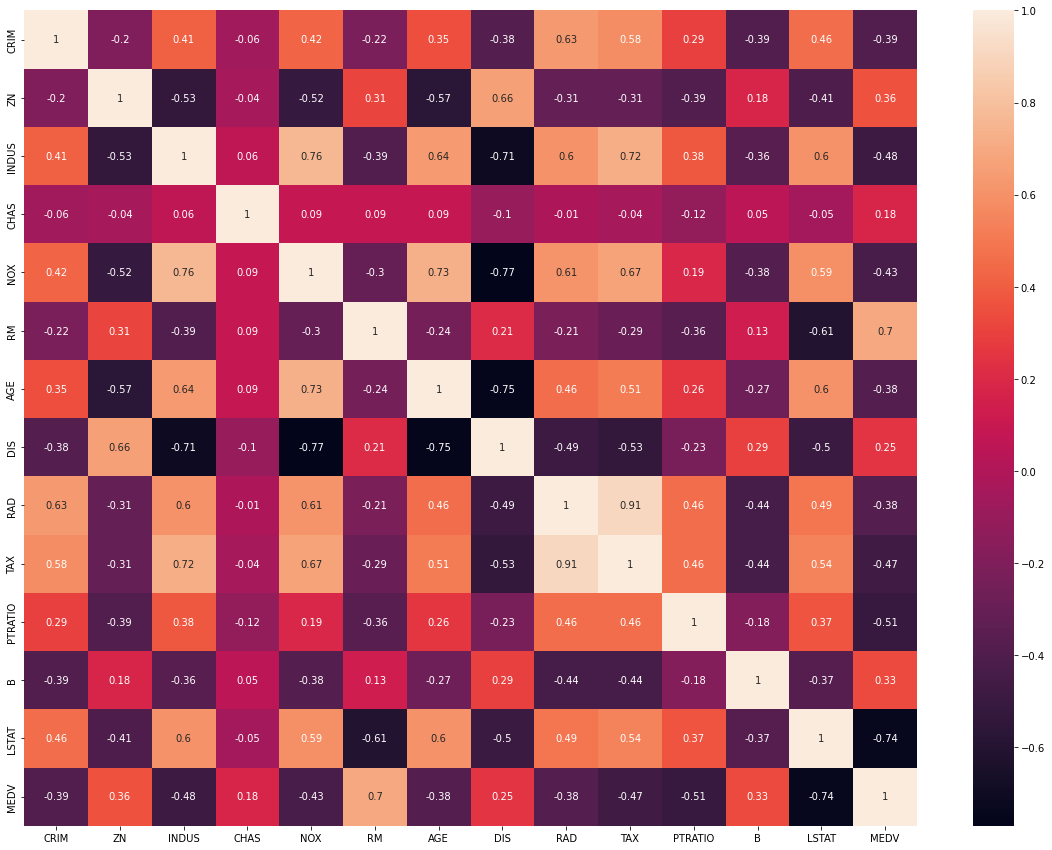

In [72]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

# Scatter graph of each feature against MEDV

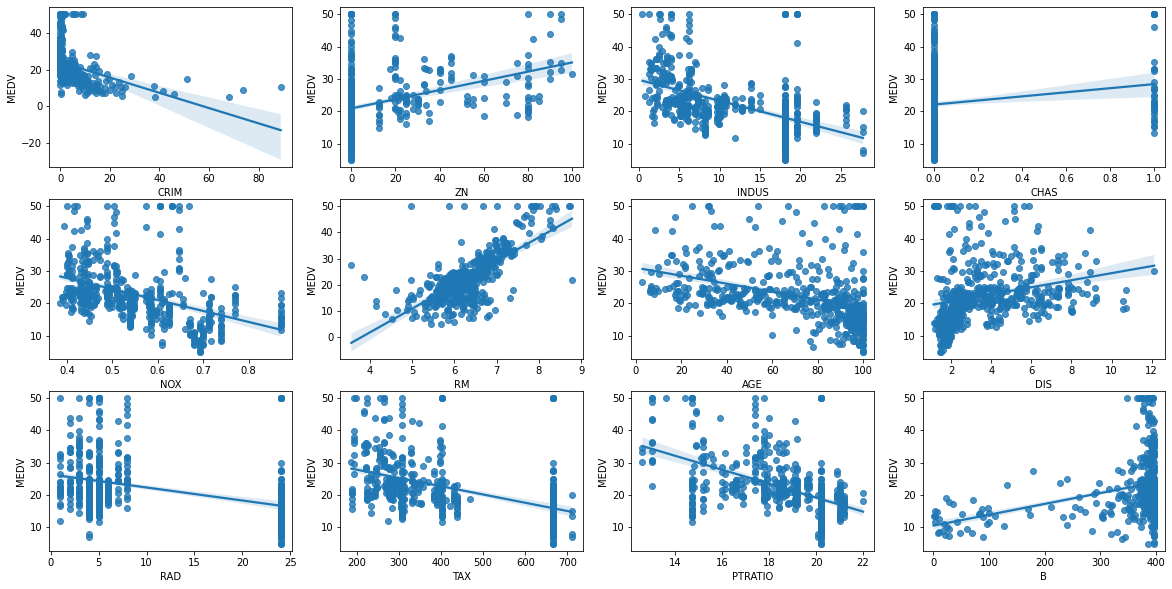

In [73]:
cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B']
x = df[cols]
y = df['MEDV']
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=[20, 10])
axs = axs.flatten()
for i, k in enumerate(cols):
    sns.regplot(x=x[k], y=y, ax=axs[i])

In [74]:
y = df['MEDV']
x = df.loc[:,df.columns!='MEDV']

In [75]:
print(np.shape(y))
print(np.shape(x))

(506,)
(506, 13)


In [76]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [77]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# Prediction for 20% test size

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [79]:
x_train.shape

(404, 13)

In [80]:
x_test.shape

(102, 13)

In [81]:
x_train[0:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
59,0.10328,25.0,5.13,0,0.453,5.927,47.2,6.9320,8,284.0,19.7,396.90,9.22
305,0.05479,33.0,2.18,0,0.472,6.616,58.1,3.3700,7,222.0,18.4,393.36,8.93
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411.0,18.3,392.33,7.79
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223.0,18.6,390.77,6.58
194,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265.0,15.6,376.70,4.38


In [82]:
x_test[0:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264.0,13.0,388.37,7.26
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666.0,20.2,393.74,21.78
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53
319,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4,304.0,18.4,396.23,12.73
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97


# Scaled the x dataset

In [83]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
x_train =  ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [84]:
x_train[0:5]

array([[-0.38160741,  0.60549491, -0.88437669, -0.28322059, -0.87167583,
        -0.49804241, -0.76469944,  1.49016895, -0.16008199, -0.73107454,
         0.55117002,  0.43996754, -0.50242416],
       [-0.38697694,  0.95797322, -1.30919175, -0.28322059, -0.71055058,
         0.49334823, -0.37750941, -0.20789914, -0.27619172, -1.10089349,
        -0.04531565,  0.40073129, -0.54318278],
       [-0.38502247,  2.1475875 , -1.37975425, -0.28322059, -1.22784743,
        -0.5599144 , -1.78418147,  3.29135105, -0.62452093,  0.02645782,
        -0.09119916,  0.38931509, -0.70340634],
       [-0.36847427,  0.38519597, -0.62084735,  3.53081671, -0.77839279,
         2.04014786, -0.60129814,  0.26714995, -0.74063066, -1.09492867,
         0.04645138,  0.37202453, -0.8734682 ],
       [-0.39145063,  2.1475875 , -1.20118792, -0.28322059, -1.31265019,
         0.47608163, -1.77352486,  1.15055533, -0.97285014, -0.84440615,
        -1.33005401,  0.21607705, -1.18267156]])

In [85]:
x_test[0:5]

array([[-0.33389844,  0.38519597, -1.05142261, -0.28322059,  0.77349774,
         1.79409881,  0.73432987, -0.79435713, -0.50841119, -0.85037097,
        -2.52302534,  0.34542368, -0.77789625],
       [ 1.58542085, -0.49599979,  0.9833695 , -0.28322059,  0.97702437,
        -0.07213293,  1.1108633 , -1.15365918,  1.69767378,  1.54748737,
         0.78058758,  0.40494309,  1.26284596],
       [ 0.62929254, -0.49599979,  0.9833695 , -0.28322059,  0.63781332,
        -0.08220512,  1.1108633 , -1.2571069 ,  1.69767378,  1.54748737,
         0.78058758,  0.09914414, -0.45885459],
       [-0.34039304, -0.49599979, -0.19747235, -0.28322059, -0.0999707 ,
        -0.2304101 , -0.35264399,  0.09333871, -0.62452093, -0.6117781 ,
        -0.04531565,  0.43254147, -0.00910424],
       [-0.39151485,  3.02878326, -1.55688052, -0.28322059, -1.13456439,
         2.30490241, -1.30463417,  0.87825424, -0.62452093, -0.90405437,
        -1.88065616,  0.41037409, -1.38084281]])

In [86]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


# Fitting the model

In [88]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
scores = reg.score(x_test, y_test)
scores

0.6880354981226227

In [89]:
y_pred = reg.predict(x_test)
df_preds = pd.DataFrame({'Actual: ': y_test, 'Predicted: ': y_pred})
df_preds.head(10)

,Actual:,Predicted:
0,43.1,36.709197
1,10.2,16.711971
2,50.0,24.454399
3,21.0,21.437354
4,50.0,40.300736
5,41.3,32.737654
6,28.6,28.207853
7,18.7,21.426641
8,21.6,25.338039
9,8.3,12.908870


In [90]:
reg.coef_

array([-1.07126797,  1.0569066 ,  0.11575305,  0.66958432, -1.77780565,
        2.58873322, -0.14338735, -2.97152482,  2.35819581, -1.89460828,
       -1.97776316,  0.9136438 , -3.55066138])

In [91]:
reg.intercept_

22.25148514851485

In [92]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("For test data")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print('accuracy:',metrics.r2_score(y_test, y_pred))

For test data
MSE: 33.979277892471885
MAE: 3.816792160667656
RMSE: 5.829174717957241
accuracy: 0.6880354981226227


In [93]:
y_pred_train = reg.predict(x_train)

In [94]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("For train data")
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('accuracy:',metrics.r2_score(y_train, y_pred_train))

For train data
MSE: 18.975436927447817
MAE: 3.0819369971220185
RMSE: 4.356080454657354
accuracy: 0.7562285979242764


# Prediction for 25% test size

In [95]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.25)

In [96]:
x_train1 =  ss.fit_transform(x_train1)
x_test1 = ss.transform(x_test1)

In [97]:
y_train1 = np.asarray(y_train1)
y_test1 = np.asarray(y_test1)

In [98]:
reg1 = LinearRegression().fit(x_train1, y_train1)
scores1 = reg1.score(x_test1, y_test1)
print(scores1)

0.7293438947823785


In [99]:
y_pred1 = reg1.predict(x_test1)
df_preds1 = pd.DataFrame({'Actual: ': y_test1, 'Predicted: ': y_pred1})
df_preds1.head(10)

,Actual:,Predicted:
0,19.1,16.908755
1,20.0,18.343204
2,37.0,30.766154
3,28.0,28.542088
4,31.0,34.734674
5,18.3,20.294756
6,23.0,23.431718
7,19.8,22.746798
8,16.4,18.728937
9,13.8,11.483012


In [100]:
reg1.coef_

array([-0.78862936,  1.01485439,  0.15036436,  0.58331514, -2.12803848,
        2.86639788,  0.07136913, -3.16262487,  2.77221423, -2.25384684,
       -2.06245151,  1.03382925, -3.7635626 ])

In [101]:
reg1.intercept_

22.43667546174143

In [102]:
print("For test data")
print("MSE:", mean_squared_error(y_test1, y_pred1))
print("MAE:", mean_absolute_error(y_test1, y_pred1))
print("RMSE:", np.sqrt(mean_squared_error(y_test1, y_pred1)))
print('Accuracy:',metrics.r2_score(y_test1, y_pred1))

For test data
MSE: 19.165735899148384
MAE: 3.113861075988066
RMSE: 4.377868876422452
Accuracy: 0.7293438947823785


In [103]:
y_pred_train1 = reg1.predict(x_train1)
print("For train data")
print("MSE:", mean_squared_error(y_train1, y_pred_train1))
print("MAE:", mean_absolute_error(y_train1, y_pred_train1))
print("RMSE:", np.sqrt(mean_squared_error(y_train1, y_pred_train1)))
print('Accuracy:',metrics.r2_score(y_train1, y_pred_train1))

For train data
MSE: 22.94035037283234
MAE: 3.319286915481073
RMSE: 4.7896085824242824
Accuracy: 0.7420765625745934
